## Imports

In [2]:
import sys
import os
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from droplet_impact import config as cfg, physics_model as pm, utils as ut


## Plotting results for the real turbine config

0.08246728125904634


/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:165: RuntimeWarning: overflow encountered in scalar power
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:165: RuntimeWarning: invalid value encountered in scalar multiply
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)


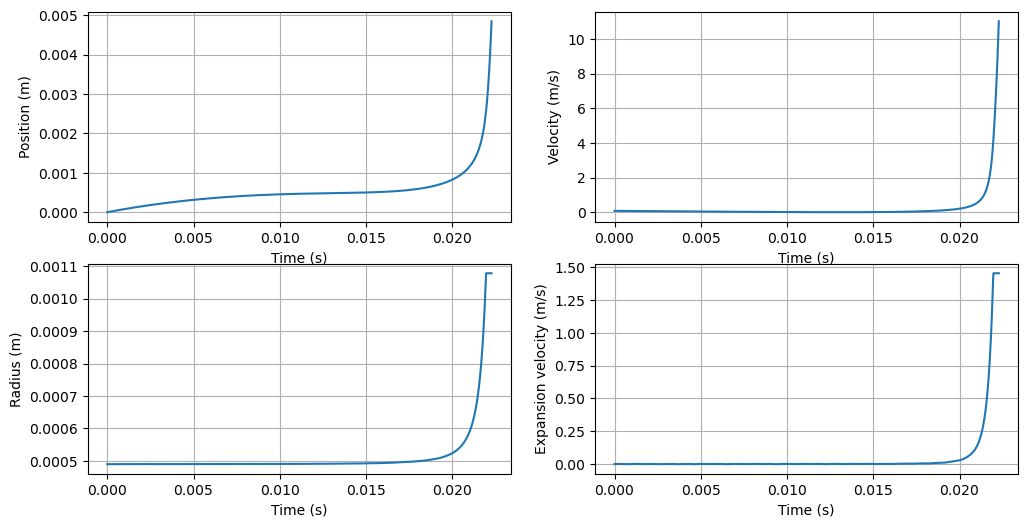

In [3]:
cfg.V_blade = 90  # V_blade
cfg.Rc_alpha = 0.071  # Radius of the blade
cfg.n = 1.3

time_span = (0, 0.1)  # Time span for the simulation
time_steps = np.linspace(time_span[0], time_span[1], 1000000)  # Time steps for evaluation
# Define the initial conditions
cfg.R = 0.49e-3
cfg.a0 = cfg.R
cfg.vx0 = -ut.v_terminal(cfg.R)
print(cfg.vx0)
initial_conditions = [0, cfg.vx0, cfg.a0, cfg.va0,-2,cfg.V_blade]

# Solve the equations of motion
model = pm.RaindropModel(initial_conditions)
events = [model.hit_the_blade_vertical] 
sol = solve_ivp(model.droplet_equations_vertical, time_span, initial_conditions, t_eval=time_steps, method='DOP853', rtol=1e-6, atol=1e-8, events=events)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='Model results')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1], label='Model results')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label='Model results')
plt.xlabel('Time (s)')
plt.ylabel('Radius (m)')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label='Model results')
plt.xlabel('Time (s)')
plt.ylabel('Expansion velocity (m/s)')
plt.grid()

plt.show()

## Comparison model/measures for the droplet terminal velocity 

In [3]:
data_measured_rain = [
    (0.17853042479908177, 0.48839641482310725),
    (0.17853042479908177, 0.7035224652432746),
    (0.17853042479908177, 0.7035224652432746),
    (0.20264064293915063, 0.5689760634448966),
    (0.2066590126291621, 0.6765236519406859),
    (0.2267508610792195, 0.9453540313944195),
    (0.2548794489092998, 1.1200358903607377),
    (0.2749712973593573, 0.958614168974135),
    (0.30309988518943765, 1.348422078360624),
    (0.3071182548794491, 1.1467259693774192),
    (0.34328358208955245, 1.3482677112176695),
    (0.40355912743972455, 1.7782882613435742),
    (0.4115958668197477, 1.6706943627049),
    (0.4517795637198625, 1.6436492392594229),
    (0.45579793340987385, 1.9125413655703394),
    (0.4598163030998854, 1.7511813910409177),
    (0.47588978185993125, 2.060363341662729),
    (0.5120551090700347, 1.979552142326508),
    (0.5442020665901264, 2.100437051973488),
    (0.5763490241102183, 2.194431205317949),
    (0.600459242250287, 2.4094646354523457),
    (0.6406429391504018, 2.5437640498219958),
    (0.6446613088404134, 2.409294831595096),
    (0.6446613088404134, 2.678202394620306),
    (0.6848450057405282, 2.6242665148723097),
    (0.700918484500574, 2.7721039276789936),
    (0.7370838117106775, 2.973645669519244),
    (0.7893226176808268, 3.134789530048531),
    (0.8053960964408726, 3.228845430250172),
    (0.849598163030999, 3.3227932734517465),
    (0.8857634902411022, 3.5377803934432563),
    (0.9179104477611941, 3.6721106812414988),
    (0.9741676234213548, 3.873575239510271),
    (0.9822043628013777, 3.9138805005354627),
    (1.126865671641791, 4.370467635963687),
    (1.1469575200918485, 4.545180368358595),
    (1.3318025258323767, 4.961277002190085),
    (1.6693455797933412, 5.874266032474989),
    (1.6814006888633757, 6.035564260147228),
    (1.7296211251435132, 6.075715154029465),
    (1.745694603903559, 5.981535760113461),
    (1.9184845005740527, 6.451460216692878),
    (1.9626865671641793, 6.4647357909868886),
    (2.0068886337543055, 6.599019768642245),
    (2.087256027554535, 6.786946328473985),
    (2.1435132032146957, 6.853957105230153),
    (2.26406429391504, 7.135846944977762),
    (2.521239954075775, 7.497884205346892),
    (2.5654420206659014, 7.605277426699727),
    (2.613662456946039, 7.699209833187007),
    (2.6859931113662454, 7.793049619388514),
    (2.7342135476463834, 7.752528244363187),
    (2.7342135476463834, 7.886982025875794),
    (2.7824339839265213, 7.806124516396685),
    (2.7904707233065444, 7.9271020463294395),
    (3.063719862227325, 8.275632181690128),
    (3.083811710677382, 8.141101216606046),
    (3.107921928817451, 8.275462377832879)
]


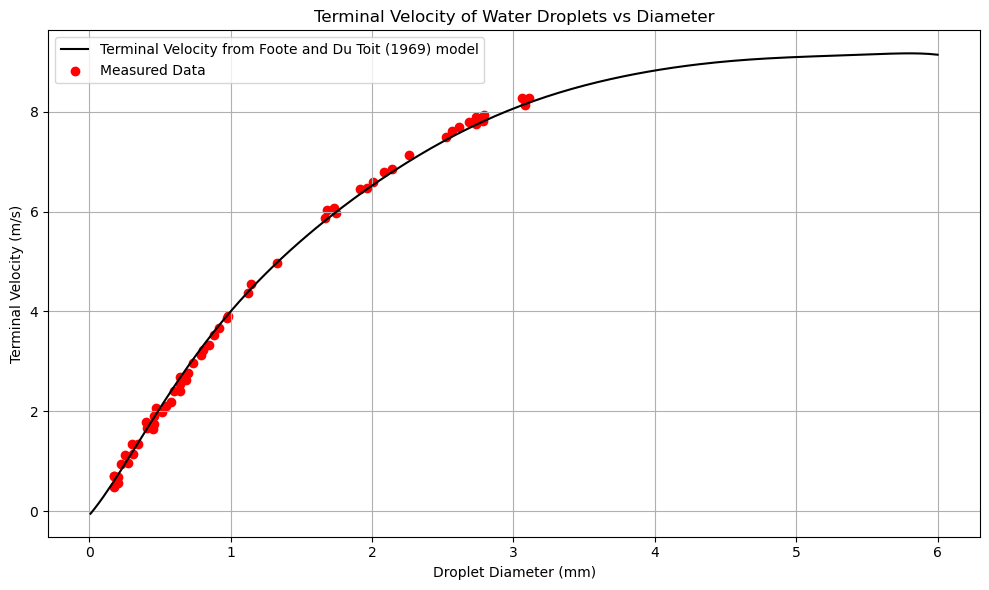

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
rho_air = 1.225  # air density at sea level (kg/m^3)
rho_water = 1000  # density of water (kg/m^3)
C_d = 0.47  # drag coefficient for sphere

# Diameter range: from 0.01 mm to 6 mm
diameters_mm = np.linspace(0.01, 6, 200)  # in mm
radii_m = diameters_mm / 2  # convert to meters

# Calculate terminal velocity using:
v_t = ut.v_terminal(radii_m)  # in m/s

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(diameters_mm, v_t, label='Terminal Velocity from Foote and Du Toit (1969) model', color='black')
plt.scatter([d[0] for d in data_measured_rain], [d[1] for d in data_measured_rain], color='red', label='Measured Data')
plt.xlabel('Droplet Diameter (mm)')
plt.ylabel('Terminal Velocity (m/s)')
plt.title('Terminal Velocity of Water Droplets vs Diameter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
